# The IEEE 754 Floating-Point Standard
---

### 2.5 The IEEE 754 Floating-Point Standard

Computers represent real numbers using a format called **floating-point arithmetic**, standardized by **IEEE 754**. This standard defines how numbers are stored in binary.

A floating-point number is typically composed of three parts:
1.  **Sign (S)**: 1 bit indicating whether the number is positive (0) or negative (1).
2.  **Exponent (E)**: A set of bits representing the scale of the number (its order of magnitude).
3.  **Mantissa (M)** or *Significand*: A set of bits representing the significant digits of the number.

The value is calculated roughly as:  $Value = (-1)^S \times M \times 2^E$

The allocation of bits for a **float-precision (`float32`)** number is:

* **Sign**: 1 bit
* **Exponent**: 8 bits
* **Mantissa**: 23 bits

The allocation of bits for a **double-precision (`float64`)** number is:
* **Sign**: 1 bit
* **Exponent**: 11 bits
* **Mantissa**: 52 bits

This finite representation has critical consequences:

#### Representation Error
Not all decimal numbers can be represented perfectly in binary. Just as $1/3$ is an infinitely repeating decimal (0.333...), the number $0.1$ is an infinitely repeating binary fraction. The computer must truncate it, leading to a small but persistent **representation error** from the very start.

In [1]:
import numpy as np

# Example of representation error
val = np.float32(0.1)

# The format() function shows the full precision stored by the computer
print(f"The stored value of 0.1 is actually: {format(val, '.60f')}")

# This error accumulates
sum_of_tenths = 0.1 + 0.1 + 0.1
print(f"The sum 0.1 + 0.1 + 0.1 is:      {format(sum_of_tenths, '.60f')}")
print(f"The value 0.3 is:                 {format(0.3, '.60f')}")

print(f"\nIs the sum equal to 0.3? {sum_of_tenths == 0.3}")

# This is why we should use a tolerance for floating-point comparisons
tolerance = 1e-9
print(f"Is the sum close to 0.3? {np.isclose(sum_of_tenths, 0.3)}")

The stored value of 0.1 is actually: 0.100000001490116119384765625000000000000000000000000000000000
The sum 0.1 + 0.1 + 0.1 is:      0.300000000000000044408920985006261616945266723632812500000000
The value 0.3 is:                 0.299999999999999988897769753748434595763683319091796875000000

Is the sum equal to 0.3? False
Is the sum close to 0.3? True


#### Rounding Error
**Rounding errors** occur when the result of a calculation has more significant digits than can be stored by the mantissa. The result must be rounded to fit.

These errors can accumulate over many operations. A particularly dangerous form is **catastrophic cancellation**, which happens when subtracting two nearly equal numbers. This can erase many significant digits of precision, leaving mostly noise and error.

**Example:** Consider the function $f(x) = \frac{1 - \cos(x)}{x^2}$. As $x \to 0$, both the numerator $(1 - \cos(x))$ and the denominator $(x^2)$ approach zero. For small $x$, $\cos(x)$ is very close to 1, and the subtraction $1 - \cos(x)$ leads to catastrophic cancellation.

We can avoid this by using the half-angle trigonometric identity: $1 - \cos(x) = 2\sin^2(x/2)$, which gives a mathematically equivalent but numerically stable formula: $f(x) = \frac{2\sin^2(x/2)}{x^2}$.

Let's compare the two formulas.

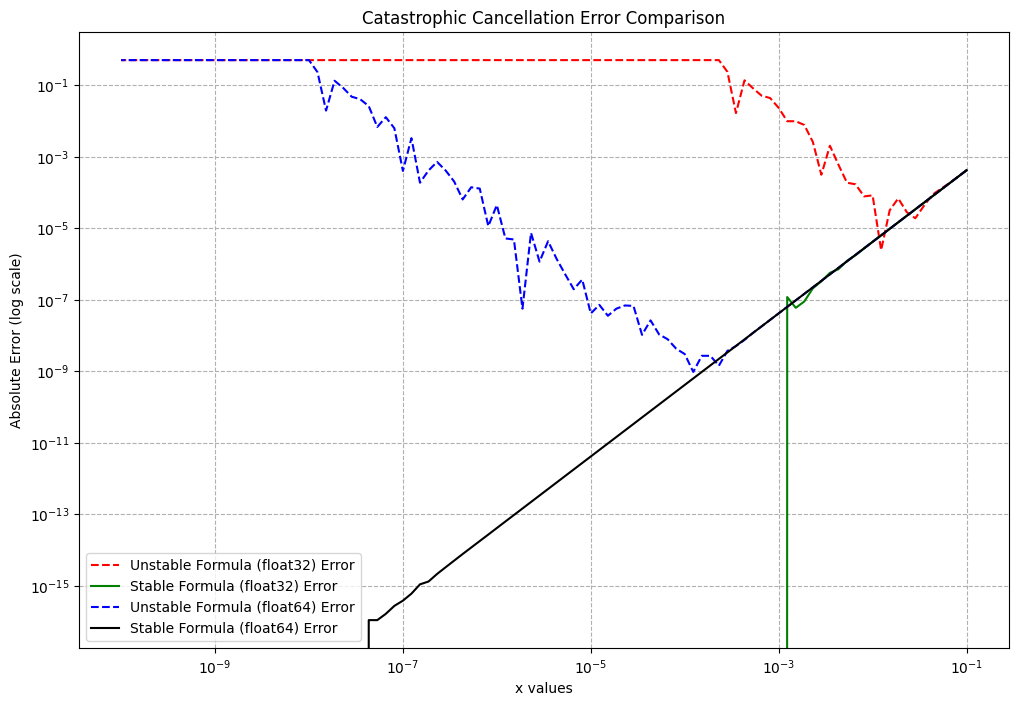

In [ ]:
import matplotlib.pyplot as plt

def unstable_formula(x):
    return (1 - np.cos(x)) / x**2

def stable_formula(x):
    return (2 * np.sin(x / 2)**2) / x**2

# The true value of the limit as x -> 0 is 0.5
true_value = 0.5

# Generate very small values for x
# from 10^-1 (0.1) to 10^-10 (0.0000000001)
x_values = np.logspace(-1, -10, 100, dtype=np.float64)

# Calculate results using float32 (single precision) to exaggerate the error
x_values_32 = x_values.astype(np.float32)
unstable_results_32 = unstable_formula(x_values_32)
stable_results_32 = stable_formula(x_values_32)

# Calculate using float64 (double precision)
unstable_results_64 = unstable_formula(x_values)
stable_results_64 = stable_formula(x_values)

# Plotting
plt.figure(figsize=(12, 8))

# Plot float32 results
plt.loglog(x_values, np.abs(unstable_results_32 - true_value), 'r--', label='Unstable Formula (float32) Error')
plt.loglog(x_values, np.abs(stable_results_32 - true_value), 'g-', label='Stable Formula (float32) Error')

# Plot float64 results
# plt.loglog(x_values, np.abs(unstable_results_64 - true_value), 'b--', label='Unstable Formula (float64) Error')
# plt.loglog(x_values, np.abs(stable_results_64 - true_value), 'k-', label='Stable Formula (float64) Error')

plt.title('Catastrophic Cancellation Error Comparison')
plt.xlabel('x values')
plt.ylabel('Absolute Error (log scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

**Analysis of the Plot:**

* The error for the **unstable formula** dramatically increases as `x` gets smaller, especially for `float32`. This is catastrophic cancellation in action: the precision is completely lost.
* The error for the **stable formula** remains very low and consistent, even for extremely small `x` and with `float32`. It avoids the subtraction of nearly equal numbers.
* The `float64` calculations are more robust than `float32`, but even they suffer from cancellation in the unstable formula.

This example highlights how a clever reformulation of a problem can lead to vastly more reliable numerical results.

## 3. Conclusion

In this notebook, we have covered the fundamental concepts of errors in numerical computation. 

**Key Takeaways:**
1.  **All computer calculations are approximations**: Due to the finite nature of floating-point representation, we must always be mindful of potential errors.
2.  **Accuracy is not Precision**: We need to consider both how close we are to the true value (accuracy) and the consistency of our results (precision).
3.  **The IEEE 754 Standard is a Trade-Off**: It provides a consistent way to handle real numbers but introduces unavoidable representation and rounding errors.
4.  **Numerical Stability Matters**: The choice of algorithm is crucial. A mathematically correct formula can be numerically unstable and produce meaningless results, as seen with catastrophic cancellation.

A solid understanding of these principles is the first and most important step toward designing and implementing numerical methods that are not only fast but, more importantly, **correct and reliable**.